In [1]:
import depth_tools
import cv2
import numpy as np

In [2]:
src_dir = '../../data/render_wave1-norm'
src_dir = '../../data/input_200318'

src_frame_dir = src_dir + '/proj'
src_gt_dir = src_dir + '/gt'
src_shading_dir = src_dir + '/shade'
src_rec_dir = src_dir + '/rec'

src_rec_dir = src_dir + '/rec'
src_rec_dir = src_dir + '/rec_ajusted'
src_frame_dir = src_dir + '/frame'
src_gt_dir = src_dir + '/gt'
src_shading_dir = src_dir + '/shading'

In [3]:
depth_thre = 0.2
difference_threshold = 0.01

num = 100
num = 48

list_diff = []
list_std = []
list_norm = []

In [4]:
for data_idx in range(num):
    print(data_idx, end='\r')
    
#     src_bgra = src_frame_dir + '/{:05d}.png'.format(data_idx)
#     src_depth_gt = src_gt_dir + '/{:05d}.bmp'.format(data_idx)
#     src_shading = src_shading_dir + '/{:05d}.png'.format(data_idx)
#     src_depth_gap = src_rec_dir + '/{:05d}.bmp'.format(data_idx)
    
    src_bgra = src_frame_dir + '/frame{:03d}.png'.format(data_idx)
    # src_depth_gap = src_rec_dir + '/depth{:03d}.png'.format(data_idx)
    src_depth_gap = src_rec_dir + '/depth{:03d}.bmp'.format(data_idx)
    src_depth_gt = src_gt_dir + '/gt{:03d}.bmp'.format(data_idx)
    # src_shading = src_shading_dir + '/shading{:03d}.png'.format(data_idx)
    src_shading = src_shading_dir + '/shading{:03d}.bmp'.format(data_idx)
    
    depth_img_gap = cv2.imread(src_depth_gap, -1)
    depth_gap = depth_tools.unpack_bmp_bgra_to_float(depth_img_gap)

    depth_img_gt = cv2.imread(src_depth_gt, -1)
    depth_gt = depth_tools.unpack_bmp_bgra_to_float(depth_img_gt)
    
    difference = depth_gt - depth_gap
    
    is_rec_available = depth_gap > depth_thre
    is_depth_close = np.logical_and(np.abs(difference) < difference_threshold,
                                is_rec_available)
    mask = is_depth_close.astype(np.float32)
    
    length = np.sum(mask)
    
    mean_diff = np.sum(difference * mask) / length
    list_diff.append(mean_diff)
    
    mean_difference = np.sum(difference * mask) / length
    var_difference = np.sum(np.square((difference - mean_difference)*mask)) / length
    std_difference = np.sqrt(var_difference)
    difference = (difference - mean_difference) / std_difference
    difference *= std_difference
    difference *= mask
    
    list_std.append(std_difference)
    
    mean_diff = np.sum(difference) / length
    list_norm.append(mean_diff)

In [5]:
list_diff[:10]

[-3.33844498403217e-05,
 -4.178290926610504e-05,
 -4.505951551646128e-05,
 -4.728941437199354e-05,
 -5.422540936541288e-07,
 -4.104109064535026e-05,
 -3.2167709149393534e-07,
 -5.0071160958621515e-05,
 -2.988920789589518e-08,
 1.2390328556753473e-05]

In [6]:
list_norm[:10]

[7.457335144006085e-20,
 -3.974156171195009e-20,
 -4.93674422499467e-20,
 2.2212820021390053e-20,
 -1.5653966992891624e-20,
 3.84734137106734e-20,
 2.596366038483638e-20,
 6.785887929722423e-21,
 -1.103767961285263e-19,
 -5.040431413414299e-20]

In [7]:
list_std[:10]

[0.0009625735748622407,
 0.0011424757720496109,
 0.0010638565374135503,
 0.001100154252621699,
 0.0008686382010921161,
 0.00114980150954229,
 0.0009253310793593323,
 0.001041497674527429,
 0.0007826346621268379,
 0.0009980470702388997]

In [8]:
np.mean(list_std)

0.0009398575157782071

In [9]:
string = ''
for i in range(num):
    string += str(i) + ',' + str(list_std[i]) + '\n'
# with open('list_sd_wave1-norm_100.txt', mode='w') as f:
with open('list_sd_board.txt', mode='w') as f:
    f.write(string)

In [10]:
list_hist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
hist_num = 20

# list_hist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# hist_num = 30

inter = 0.0002
for i in range(num):
    for j in range(hist_num):
        if (list_std[i] > inter*j) and (list_std[i] < inter*(j+1)):
            list_hist[j] += 1
list_hist

[0, 0, 0, 7, 27, 12, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
np.sum(np.array(list_hist))

48

In [12]:
str_hist = ''
scale = inter*1000
for i in range(hist_num):
    str_hist += '{:.01f} - {:.01f},{}\n'.format(scale*i, scale*(i+1), list_hist[i])
# with open('hist_sd_wave1-norm_100.txt', mode='w') as f:
with open('hist_sd_board.txt', mode='w') as f:
    f.write(str_hist)

(-5, 5)

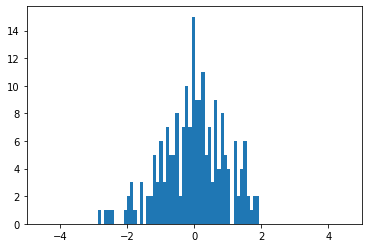

In [103]:
import matplotlib.pyplot as plt

norms = np.random.normal(
            loc = 0,
            scale = 1,
            size = 200)
plt.hist(norms ,bins=50)
plt.xlim(-5, 5)

(-1, 2)

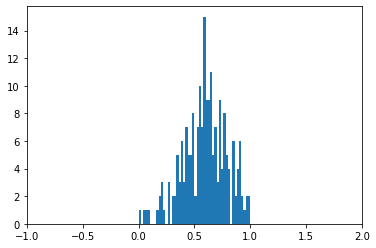

In [104]:
height_norms = norms - np.min(norms)
height_norms /= np.max(height_norms)
plt.hist(height_norms ,bins=50)
plt.xlim(-1, 2)

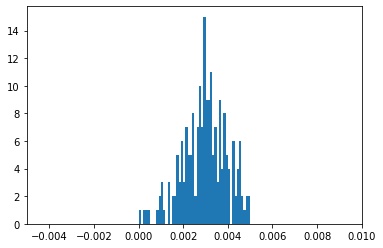

In [105]:
height_norms = norms - np.min(norms)
height_norms = height_norms / np.max(height_norms) * 0.005
plt.hist(height_norms ,bins=50)
plt.xlim(-0.005, 0.01)
plt.savefig('hist_norm.png')

(-0.005, 0.015)

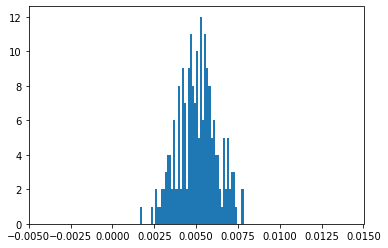

In [127]:
avg_height = 0.005
norms = np.random.normal(
            loc = avg_height,
            scale = avg_height / 4,
            size = 200)
plt.hist(norms ,bins=50)
plt.xlim(-0.005, 0.015)